In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [50]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/hicrep/report.tsv"

tool_pretty_names = {
    "cooler_cooler": "hicrep (cooler)",
    "hictk_hic": "hicrep (hictk hic)",
    "hictk_cooler": "hicrep (hictk cool)",
}

color_palette = ["cornflowerblue", "forestgreen", "darkorange"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [58]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_mb"] = df["memory"] / 1.0e3  # kb -> mb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
  
    return df.sort_values(["resolution", "tool"])

In [60]:
df = import_data(bench_results)
df

,tool,format,resolution,time,memory,time_min,memory_mb
0,hicrep (cooler),cooler,25000,177.66,2052748,2.961000,2052.748
3,hicrep (cooler),cooler,25000,179.63,2012108,2.993833,2012.108
6,hicrep (cooler),cooler,25000,180.25,1966896,3.004167,1966.896
9,hicrep (cooler),cooler,25000,179.99,2006876,2.999833,2006.876
12,hicrep (cooler),cooler,25000,179.25,2008908,2.987500,2008.908
15,hicrep (cooler),cooler,25000,179.44,1975188,2.990667,1975.188
18,hicrep (cooler),cooler,25000,180.56,1895812,3.009333,1895.812
21,hicrep (cooler),cooler,25000,178.71,2050760,2.978500,2050.760
24,hicrep (cooler),cooler,25000,179.59,1899792,2.993167,1899.792
27,hicrep (cooler),cooler,25000,179.14,1986460,2.985667,1986.460


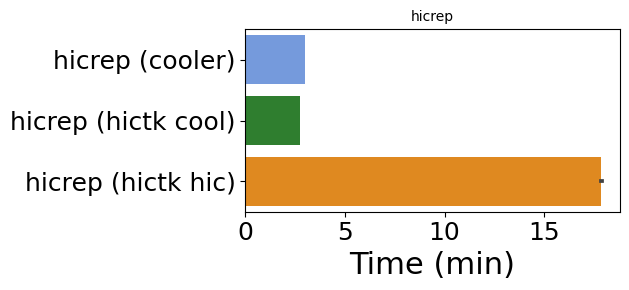

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 3))
sns.barplot(df, y="tool", x="time_min", estimator="median", ax=ax, errorbar="se", palette=color_palette)
ax.set(title="hicrep", xlabel="Time (min)", ylabel="")

fig.tight_layout()
fig.savefig("/tmp/hicrep_runtime.png", dpi=600)
fig.savefig("/tmp/hicrep_runtime.svg")

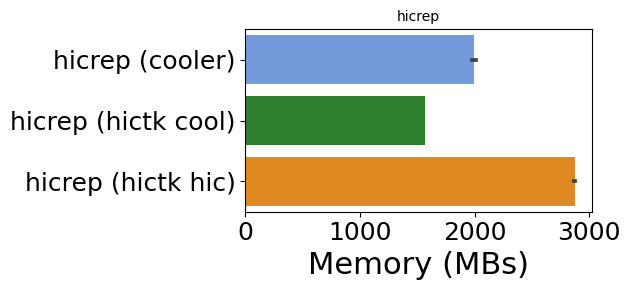

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 3))
sns.barplot(df, y="tool", x="memory_mb", estimator="median", ax=ax, errorbar="se", palette=color_palette)
ax.set(title="hicrep", xlabel="Memory (MBs)", ylabel="")

fig.tight_layout()
fig.savefig("/tmp/hicrep_memory.png", dpi=600)
fig.savefig("/tmp/hicrep_memory.svg")